In [220]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [221]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Ice%20Cream.csv")
data.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [223]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [224]:
data.columns

Index(['Temperature', 'Revenue'], dtype='object')

#Train Test Split

In [225]:
x,tx = train_test_split(data, random_state=2529)
farm = x[['Revenue']].values.tolist()

#Perceptron Linear Regression

In [226]:
att = x[['Temperature']].values.tolist()
for v in att:
  v.append(1)

w = np.array([0.005,0.001])
eta = 0.000002

iter=0
miter=20
while iter<miter:
  for i,V in enumerate(att):
    v=np.array(V)
    y=np.dot(w,v)

    w = w + eta*(farm[i][0] - y)*v

  iter+=1
print(w)

def plr(v):
  return np.dot(w,v)

[23.18097551  0.99497849]


#Testing The Model

In [227]:
N=len(tx)
para = tx[['Temperature']].values.tolist()
out = tx[['Revenue']].values.tolist()
e=0

act = np.zeros(N)
prd = np.zeros(N)
for i,v in enumerate(para):
  v.append(1)
  act[i]=out[i][0]
  prd[i]=plr(v)
  j=act[i]-prd[i]
  e+=(j*j)
e=math.sqrt(e/N)
print("Root Mean Square Error")
print(e)

Root Mean Square Error
27.54717535691482


#Visualization of Actual vs Predicted

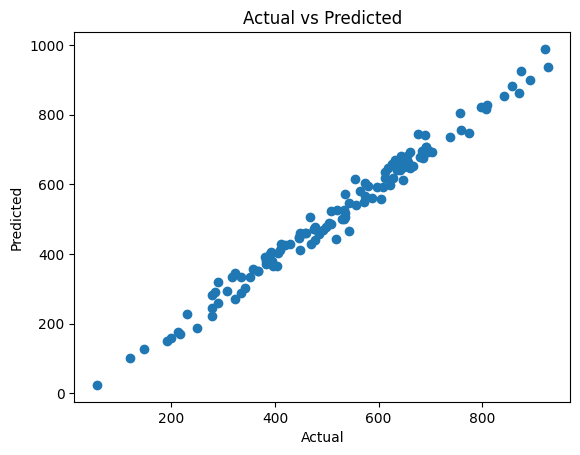

In [228]:
import matplotlib.pyplot as plt
plt.scatter(act,prd)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()